In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame, concat

import os
path='E:\【ML_DL】\【服装项目】\dataset\shopN\data\shop_'

销售数据取自data_full.7z中的'sale_XXX.csv'系列csv文件，将所有sale数据进行合并。一共有638家店铺，其中取出：拥有数据数目大于100条可以用于lstm时序预测、以及日期可以满足预测条件的店铺，用shop_newest_len100表示       

In [2]:
shop_newest_len100 = [1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 70, 72, 75, 76, 77, 78, 81, 83, 85, 86, 88, 89, 90, 91, 93, 94, 95, 100, 101, 105, 106, 107, 110, 111, 114, 115, 121, 122, 125, 127, 128, 132, 133, 134, 135, 146, 147, 151, 156, 157, 158, 159, 160, 162, 163, 164, 167, 169, 170, 172, 178, 179, 183, 185, 186, 189, 196, 199, 200, 201, 205, 206, 209, 218, 221, 223, 225, 233, 234, 237, 239, 246, 250, 260, 272, 299, 308, 311, 321, 451, 481]

保存每个店铺的数据长度

In [3]:
shop_length = []# 保存每个店铺的数据长度
for id in shop_newest_len100:
    df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
    shop_length.append(len(df))

In [4]:
shop_length[:10]

[225, 558, 558, 446, 366, 331, 513, 177, 362, 497]

这里随机选取第7个店铺进行展示

In [5]:
id = 7# 这里随机选取第7个店铺进行展示
df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
# df=df.drop(['sale_date'],axis=1)
len(df)

513

In [6]:
df[:5]

,sale_date,sale_price,Quantity
0,2009-01-05,26167.5,85.0
1,2009-01-12,26142.0,81.0
2,2009-01-19,36358.0,98.0
3,2009-01-26,20479.0,56.0
4,2009-02-02,9280.0,35.0


In [7]:
df['sale_date']=pd.to_datetime(df['sale_date'], format="%Y/%m/%d")
df.set_index('sale_date', inplace=True)

In [8]:
df[:5]

,sale_price,Quantity
sale_date,,
2009-01-05,26167.5,85.0
2009-01-12,26142.0,81.0
2009-01-19,36358.0,98.0
2009-01-26,20479.0,56.0
2009-02-02,9280.0,35.0


In [9]:
df = df.resample('m').sum()

In [12]:
df

,sale_price,Quantity
sale_date,,
2009-01-31,109146.50,320.0
2009-02-28,45340.00,153.0
2009-03-31,82145.00,219.0
2009-04-30,123631.50,385.0
2009-05-31,85404.00,338.0
2009-06-30,106033.50,544.0
2009-07-31,119011.00,529.0
2009-08-31,121254.92,337.0
2009-09-30,118603.00,312.0


In [11]:
len(df)

118

##### 进行简单的拟合来预测月销售额

误差计算

In [19]:
# 定义相对误差的计算
def mean_squared_error01(a,b):
    e=[]
    for i in range(len(a)):
        dif = a[i]-b[i]
        e1 = abs(dif / b[i])
        e.append(e1)
    return e

进行简单的线性拟合

In [28]:
x = df['Quantity'][:(len(df)-10)].values
Y = df['sale_price'][:(len(df)-10)].values

 
611.9 x - 2.221e+04


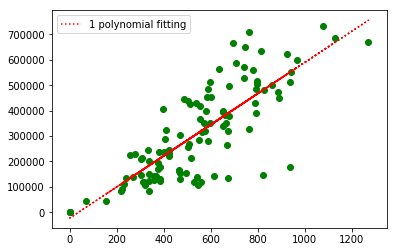

In [29]:
coef1 = np.polyfit(x,Y, 1)
poly_fit1 = np.poly1d(coef1)
plt.plot(x, poly_fit1(x), 'r:',label="1 polynomial fitting")
print(poly_fit1)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [30]:
y_true = df['sale_price'][(len(df)-10):].values
y_true

array([276568., 234348., 242077., 237721., 148735., 162138., 170305.,
       132163., 119566., 126465.])

In [31]:
y_pred = poly_fit1(df['Quantity'][(len(df)-10):].values)
y_pred

array([167460.43831434, 155835.26725242, 226198.14473247, 240270.72022847,
       169295.99163991, 192546.33376375, 207842.6114768 , 124019.00960927,
       101992.36970248,  95873.85861725])

In [32]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.2253202728636387

进行简单的二阶拟合

          2
-0.04529 x + 663.8 x - 3.445e+04


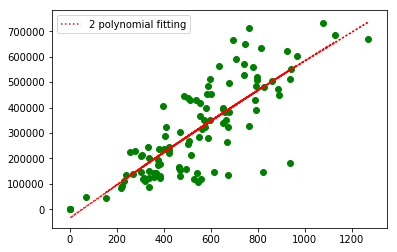

In [33]:
coef2 = np.polyfit(x,Y, 2)
poly_fit2 = np.poly1d(coef2)
plt.plot(x, poly_fit2(x), 'r:',label="2 polynomial fitting")
print(poly_fit2)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [34]:
y_true = df['sale_price'][(len(df)-10):].values
y_true

array([276568., 234348., 242077., 237721., 148735., 162138., 170305.,
       132163., 119566., 126465.])

In [35]:
y_pred = poly_fit2(df['Quantity'][(len(df)-10):].values)
y_pred

array([166963.61879484, 154869.47895037, 227570.86208294, 241967.3916965 ,
       168870.23075459, 192950.08878347, 208720.77060507, 121602.52112671,
        98428.07504624,  91969.89601235])

In [36]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.23905928626853884

三阶多项式拟合

            3          2
-0.0003457 x + 0.5668 x + 365 x + 969.3


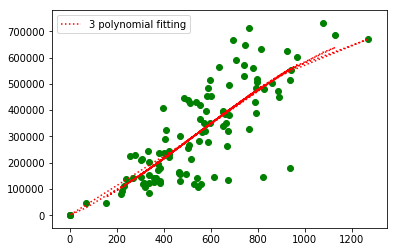

In [37]:
coef3 = np.polyfit(x,Y, 3)
poly_fit3 = np.poly1d(coef3)
plt.plot(x, poly_fit3(x), 'r:',label="3 polynomial fitting")
print(poly_fit3)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [38]:
y_pred = poly_fit3(df['Quantity'][(len(df)-10):].values)
y_pred

array([158276.72915304, 146650.26476463, 219435.18833345, 234555.69687349,
       160129.04127215, 183950.13617912, 199948.36233478, 115850.96231747,
        95521.201686  ,  90033.79043626])

In [39]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.2597203179773211

可以看到，线性拟合的相对误差为0.22，二次拟合和三次拟合并没有降低误差因为存在过拟合。选用的拟合模型越简单越好，所以应该在这里选用线性拟合即为拟合方法中效果做好的。